# GENERAL

## Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market.

Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

## Characters and products 
### Characters
- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
- Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
- Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.

### Products
- Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
- Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
- Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
- Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
- Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

## About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.


# ASK 
This project aims to answer business questions for Bellafeat from Fitbit's data. Those business questions are:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# PREPARATION

## 1. Data Storage Location

The data is stored at [this link](http://www.kaggle.com/datasets/arashnic/fitbit), which is claimed to be generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring

## 2. Data's Structure
There are totally 18 csv file in the dataset: 6 files tracking the activity per day, 8 files  per minute, 3 files per hour, 1 file per second

## 3. Data Credibility and Integrity
The data is claimed to track the activities for 30 Fibit users. However, the number of unique users from each files are different. For the purpose of this project's purpose is educational, there shall not be further investigation on the creditbility and integrity of this dataset

## 4. Data licensing and accessibility
The data source is from [this link ](http://zenodo.org/record/53894#.X9oeh3Uzaao) and license CC0: [Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)

# PROCESS

There are 3 files are the summarison of the 18 files. Therefore, in this projects, these 3 will be selected and joined together for analysing. 

These are:
- dailyActivity_merged.csv - containing the information about the total step, active walking minutes, active walking distance,... of the users per day
- heartrate_seconds_merged.csv - containing the heartrate of users per second
- sleepDay_merged.csv - containing the sleeping information (total minutes asleep, total time in bed,... ) of users per day


### 1. Importing and cleaning the daily_Activity_merged.csv file

In [1]:
# Import all necessary library

import pandas as pd
import numpy as np
from pandas import merge
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import the file and save it in Activity variable
Activity = pd.read_csv('/kaggle/input/fitbit-database/dailyActivity_merged.csv')

In [3]:
# Check the columns name with the first 5 row data
Activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# Check the number of non-null and data type information
Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
# Check the statistical figure of the data
Activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
# Check the number of duplicated row in the data
Activity.duplicated().sum()

0

In [7]:
# Check the number of unique users observed in this data
len(Activity.Id.unique())

33

Activity variable has no duplicated column, no column with null value. However, the 'ActivityDate' should has the data type of datetime (not object) so it need to be transfered

In [8]:
# Transfer the data type of ActivityDate from object to datime64
Activity.ActivityDate = Activity.ActivityDate.astype('datetime64')

In [9]:
# Recheck the data information
Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

#### 2. Importing and cleaning the sleepDay_merged.csv file

In [10]:
Sleep = pd.read_csv('/kaggle/input/fitbit-database/sleepDay_merged.csv')

In [11]:
Sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [12]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [13]:
Sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [14]:
Sleep.duplicated().sum()

3

In [15]:
len(Sleep.Id.unique())

24

There are 2 issues in this data:
- It has 3 duplicated rows which need to be excluded properly for the effective analytics
- The SleepDay column needs a change in data type (from object to datatime), the format and name for easy joining with Activity data

Also, the number of unique user and total entries of Sleep is less than Activity, there will be more than 500 null rows in the columns of Sleep after joining

In [16]:
# Check the duplicated row
Sleep[Sleep.duplicated(keep = False) == True]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
160,4388161847,5/5/2016 12:00:00 AM,1,471,495
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
222,4702921684,5/7/2016 12:00:00 AM,1,520,543
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
379,8378563200,4/25/2016 12:00:00 AM,1,388,402
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


In [17]:
# Remove duplicated rows and recheck
Sleep.drop_duplicates(inplace = True)
Sleep.duplicated().sum()

0

In [18]:
# Change data type of SleepDay column
Sleep.SleepDay = Sleep.SleepDay.astype('datetime64')

In [19]:
# Change format of SleepDay column & re-change it data type
Sleep.SleepDay = Sleep.SleepDay.dt.date
Sleep.SleepDay = Sleep.SleepDay.astype('datetime64')

In [20]:
# Change name of SleepDay columns
Sleep.rename(columns={'SleepDay' : 'ActivityDate'}, inplace = True)

In [21]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   ActivityDate        410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.2 KB


### 3. Importing and cleaning the heartrate_seconeds_merged.csv file

In [22]:
Heartrate = pd.read_csv('/kaggle/input/fitbit-database/heartrate_seconds_merged.csv')

In [23]:
Heartrate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [24]:
Heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [25]:
Heartrate.describe()

,Id,Value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


In [26]:
len(Heartrate.Id.unique())

14

In [27]:
Heartrate.duplicated().sum()

0

There are 3 issuses with this data
- The data observed the heartrate over each 5 seconds, which is unjoinable to Activity and Sleep but this this time range is useful for other analytics. Therefore, a copy will be made for further analysing while Heartrate will be transfered to keep the information of users each day with the heartrate value is the average heartrate in a day
- The Time column needs a change in data type (to datetime), format and name to join the 2 data above
- The Value column name should be changed to reflect correcly its value after joining

Also, the number of unique user and total entries of Heartrate is less than Activity, there will be null rows in the columns of Heartrate after joining

In [28]:
# Change the data type of the Time column
Heartrate['Time'] = pd.to_datetime(Heartrate.Time)

In [29]:
# Change format of Heartrate column
Heartrate.Time = Heartrate.Time.dt.date

In [30]:
# Change the names of Time and Value columns
Heartrate = Heartrate.rename(columns={'Time' : 'ActivityDate', 'Value' : 'HeartRate'})

In [31]:
# Transfer the data, grouping the average heartrate per day by each user
Heartrate = Heartrate.groupby(['Id', 'ActivityDate'])['HeartRate'].mean()
Heartrate = pd.DataFrame(Heartrate).reset_index()

In [32]:
# Change the data type of ActivityDate back to datetime
Heartrate['ActivityDate'] = Heartrate['ActivityDate'].astype('datetime64')

In [33]:
Heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            334 non-null    int64         
 1   ActivityDate  334 non-null    datetime64[ns]
 2   HeartRate     334 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.0 KB


### 4. Merge Activity, Sleep and Heartrate for analysis

In [34]:
# Merge Activity and Sleep on Id and ActivityDate, using outer join to keep all the original values
merge1 = merge(Activity, Sleep, on = ['Id', 'ActivityDate'], how = 'outer')

In [35]:
# Merge merge1 and Heartrate
Data = merge(merge1, Heartrate, on = ['Id', 'ActivityDate'], how = 'outer')

In [36]:
# Have a overview check at Data
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,HeartRate
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,410.000000,410.000000,410.000000,334.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1.119512,419.173171,458.482927,78.614059
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.346636,118.635918,127.455140,10.613254
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,61.000000,59.377175
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000,361.000000,403.750000,70.465679
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1.000000,432.500000,463.000000,77.494179
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1.000000,490.000000,526.000000,84.933171
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,3.000000,796.000000,961.000000,109.789625


In [37]:
# Save Data to the output for next analytic steps
Data.to_csv('Fitbit_data.csv', index = False)

### Insights from data exploration
The dataset show limitation in sample size. The number of users observed is small (33) and not all of 33 users share the heart rate and sleep information so the analytics within and crossing the 3 chosen .csv files does not have high confidence interval.

The result should be used as recommendation only and further data collection & calculation should be executed to generate a result with high confidence interval & low margin of error

# ANALYZE & SHARE

### 1. Correlation

This session aims to find out the correlation between columns of Data. To be more specific, the columns TotalSteps, TotalDistance, Calories, TotalMinutesAsleep and Calories would be examined

In [38]:
Data[['TotalSteps', 'TotalDistance']].corr()

,TotalSteps,TotalDistance
TotalSteps,1.000000,0.985369
TotalDistance,0.985369,1.000000


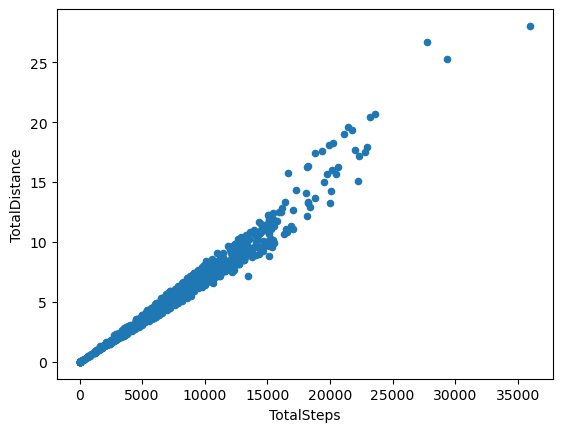

In [39]:
Data[['TotalSteps', 'TotalDistance']].plot.scatter(x = 'TotalSteps', y = 'TotalDistance');

In [40]:
Data[['TotalSteps', 'TotalMinutesAsleep']].corr()

,TotalSteps,TotalMinutesAsleep
TotalSteps,1.000000,-0.190344
TotalMinutesAsleep,-0.190344,1.000000


In [41]:
Data[['TotalSteps', 'HeartRate']].corr()

,TotalSteps,HeartRate
TotalSteps,1.000000,0.168822
HeartRate,0.168822,1.000000


In [42]:
Data[['TotalSteps', 'Calories']].corr()

,TotalSteps,Calories
TotalSteps,1.000000,0.591568
Calories,0.591568,1.000000


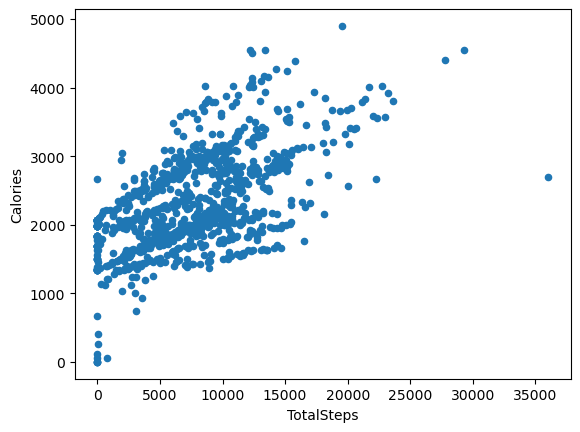

In [43]:
Data[['TotalSteps', 'Calories']].plot.scatter(x = 'TotalSteps', y = 'Calories');

In [44]:
Data[['TotalDistance', 'HeartRate']].corr()

,TotalDistance,HeartRate
TotalDistance,1.000000,0.168793
HeartRate,0.168793,1.000000


In [45]:
Data[['TotalDistance', 'Calories']].corr()

,TotalDistance,Calories
TotalDistance,1.000000,0.644962
Calories,0.644962,1.000000


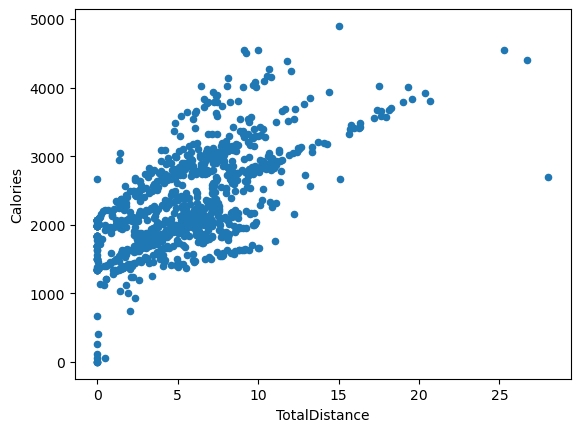

In [46]:
Data[['TotalDistance', 'Calories']].plot.scatter(x = 'TotalDistance', y = 'Calories');

In [47]:
Data[['TotalDistance', 'TotalMinutesAsleep']].corr()

,TotalDistance,TotalMinutesAsleep
TotalDistance,1.000000,-0.176936
TotalMinutesAsleep,-0.176936,1.000000


In [48]:
Data[['Calories', 'HeartRate']].corr()

,Calories,HeartRate
Calories,1.000000,0.110798
HeartRate,0.110798,1.000000


In [49]:
Data[['Calories', 'TotalMinutesAsleep']].corr()

,Calories,TotalMinutesAsleep
Calories,1.000000,-0.031699
TotalMinutesAsleep,-0.031699,1.000000


In [50]:
Data[['TotalMinutesAsleep', 'HeartRate']].corr()

,TotalMinutesAsleep,HeartRate
TotalMinutesAsleep,1.000000,-0.252345
HeartRate,-0.252345,1.000000


To summarize, there is only 1 correlation coefficent that is > 0.7 showing strong correlation between TotalSteps and TotalDistance. There are 2 intermediate correlation, one is between TotalSteps & Calories (0.59), the other is between TotalDistance & Calories (0.64)

### 2. User Segmentation

According to CDC, adults should take 10,000 steps per day for general health (source: [this link](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day#for-general-health)). Therefore, this project will divide the users into 2 segment based on their average steps per day and analyze the diffence of average TotalSteps, TotalDistance, Calories, TotalMinutesAsleep, HeartRate between those 2 types

In [51]:
# Segment user
import sqlite3

conn = sqlite3.connect('my_database.db')
Data_SQL = pd.read_csv('/kaggle/working/Fitbit_data.csv')
Data_SQL.to_sql('Data_SQL', conn, if_exists='replace', index=False)

conn.close()

In [52]:
conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()

user_below10000 = (

" SELECT "
"    Id,"
"    TotalSteps,"
"    TotalDistance, "
"    Calories, "
"    TotalMinutesAsleep,"
"    HeartRate"
" FROM Data_SQL "
" WHERE Id NOT IN "
"  (SELECT Id FROM ( "
"    (SELECT Id, AVG(TotalSteps) "
"     FROM Data_SQL "
"     GROUP BY Id "
"     HAVING AVG(TotalSteps) > 10000) ) ) " 
)

cursor.execute(user_below10000)

user_below10000 = cursor.fetchall()

conn.close()

In [53]:
conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()

user_above10000 = (
" SELECT "
"    Id,"
"    TotalSteps,"
"    TotalDistance, "
"    Calories, "
"    TotalMinutesAsleep,"
"    HeartRate"
" FROM Data_SQL "
" WHERE Id IN "
"  (SELECT Id FROM ( "
"    (SELECT Id, AVG(TotalSteps) "
"     FROM Data_SQL "
"     GROUP BY Id "
"     HAVING AVG(TotalSteps) > 10000) ) ) " )

cursor.execute(user_above10000)
user_above10000 = cursor.fetchall()
conn.close()


In [54]:
# Dataframe user_above10000 contains data of user who has the overall average TotalSteps > 10000
# Dataframe user_above10000 contains data of user who has the overall average TotalSteps < 10000

user_above10000 = pd.DataFrame(user_above10000)
user_below10000 = pd.DataFrame(user_below10000)

In [55]:
user_above10000.columns = ['Id>', 'TotalSteps>', 'TotalDistance>', 'Calories>', 'TotalMinutesAsleep>', 'HeartRate>']

In [56]:
user_below10000.columns = ['Id<', 'TotalSteps<', 'TotalDistance<', 'Calories<', 'TotalMinutesAsleep<', 'HeartRate<']

In [57]:
len(user_below10000['Id<'].unique())

26

In [58]:
len(user_above10000['Id>'].unique())

7

<Axes: xlabel='Type'>

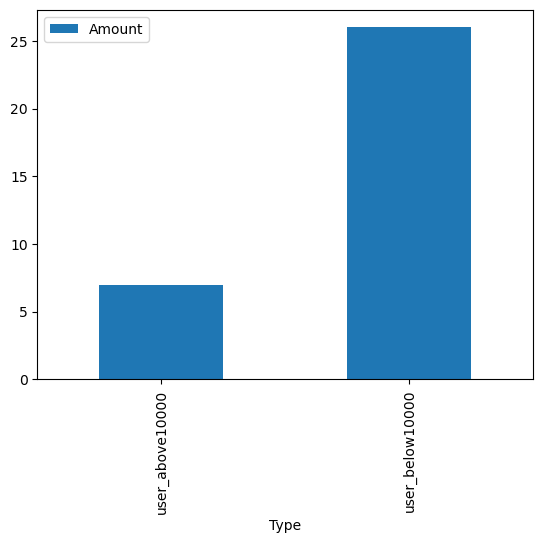

In [59]:
extra = [
    ["user_above10000", 7],
    ["user_below10000", 26] ]

extra_chart = pd.DataFrame(extra, columns=["Type", "Amount"])
extra_chart.plot.bar(x = 'Type')

The number of user who have average steps more than 10000 is less than those who has average steps less than 10000 per day and only makes up about 21% of total users

In [60]:
# Concat the dataframe of user_above10000, user_below10000 for statistical visual purpose
user_compare = pd.concat([user_above10000, user_below10000], axis = 1)

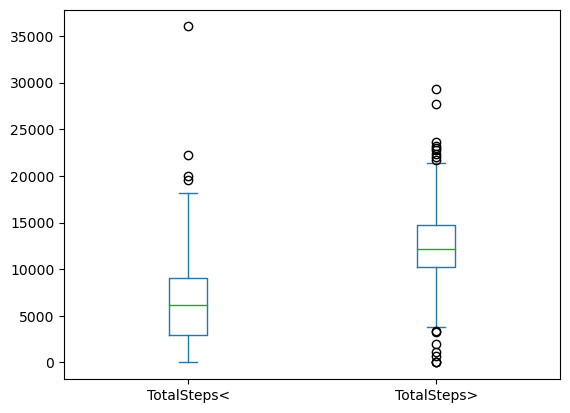

In [61]:
user_compare[['TotalSteps<', 'TotalSteps>']].plot.box();

In [62]:
user_compare[['TotalSteps<', 'TotalSteps>']].mean()

TotalSteps<     6224.205761
TotalSteps>    12522.227488
dtype: float64

There is a significant gap between the avagerage steps per day of the 2 user types (more than 6000). user_above10000 type has many upper and lower outliners which means that they don't walk stable around the avarage steps everyday

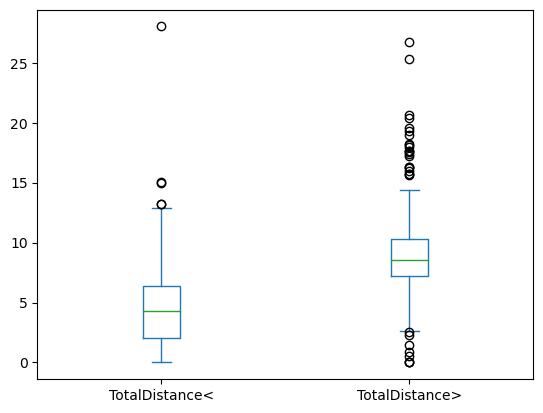

In [63]:
user_compare[['TotalDistance<', 'TotalDistance>']].plot.box();

In [64]:
user_compare[['TotalDistance<', 'TotalDistance>']].mean()

TotalDistance<    4.400796
TotalDistance>    9.251848
dtype: float64

Accordingly, there is a significant gap between the avagerage distance per day of the 2 user types (more than 4km), user_above10000 also has many upper and outliner in the average walking distance

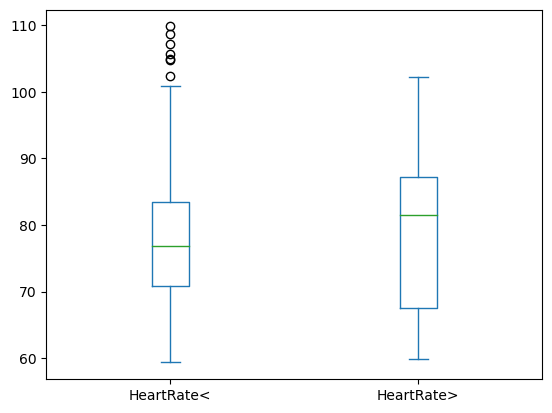

In [65]:
user_compare[['HeartRate<', 'HeartRate>']].plot.box();

There is no significant difference in the heart rate of the 2 types

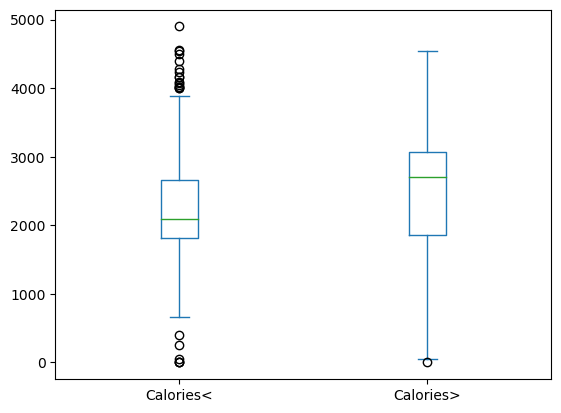

In [66]:
user_compare[['Calories<', 'Calories>']].plot.box();

In [67]:
user_compare[['Calories<', 'Calories>']].mean()

Calories<    2231.087791
Calories>    2554.170616
dtype: float64

There's a slight difference in the calories burnt by the 2 types, the gap is around 300 calories per day.

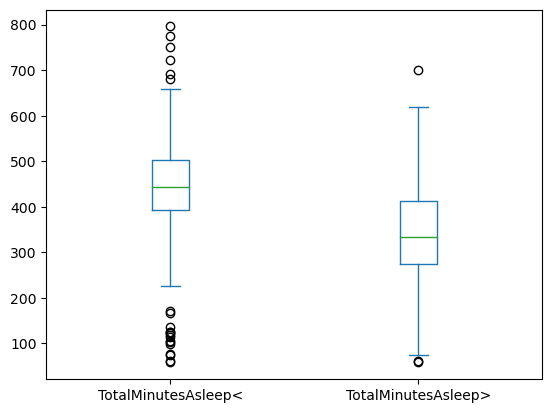

In [68]:
user_compare[['TotalMinutesAsleep<', 'TotalMinutesAsleep>']].plot.box();

In [69]:
user_compare[['TotalMinutesAsleep<', 'TotalMinutesAsleep>']].mean()

TotalMinutesAsleep<    438.905775
TotalMinutesAsleep>    339.024691
dtype: float64

Surprisingly, user_above10000 has the shorter average of sleeping time when compare to the user_below10000. The gap is around 1.5 hours. user_above10000 sleep less than 6 hours per night in average while user_below10000 sleep more than 7 hours per night.

This could be because the user_above10000 walk actively so they get tired and find it difficult to sleep at night. Or it could be because this type of user tend to be busier so they spend least time on sleeping. 

### 3. Weekly Activity

This session aim to compare the difference of average the 5 factors (TotalSteps, TotalDistance, Calories, TotalMinutesAsleep and Calories) during the week

In [70]:
import sqlite3

conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()

summary_week = (
    "SELECT "
    "   CAST(strftime('%w', ActivityDate) AS INTEGER) AS DayOfWeek, "
    "   AVG(TotalSteps) AS TotalSteps, "
    "   AVG(TotalDistance) AS TotalDistance, "
    "   AVG(Calories) AS Calories, "
    "   AVG(TotalMinutesAsleep) AS TotalMinutesAsleep, "
    "   AVG(HeartRate) AS HeartRate " 
    "FROM Data_SQL "
    "GROUP BY DayOfWeek "
    "ORDER BY DayOfWeek"
)

cursor.execute(summary_week)
summary_week = cursor.fetchall()
conn.close()


In [71]:
summary_week = pd.DataFrame(summary_week)
summary_week.columns = [['DayOfWeek', 'TotalSteps', 'TotalDistance', 'Calories', 'TotalMinutesAsleep', 'HeartRate']]

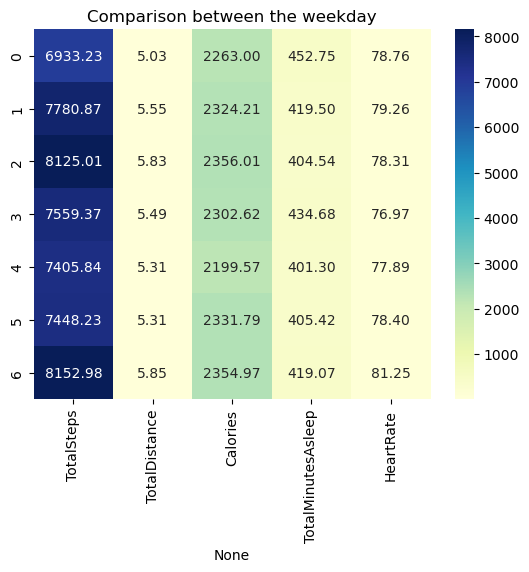

In [72]:
# Making a heatmap to compare the diffence of factor between days in the week, the value in the heatmap is avg of each factor
# The index in the left refers to the days of week (0 = Sunday, 1 = Monday,..., 6 = Sartuday) 

sns.heatmap(summary_week[['TotalSteps', 'TotalDistance', 'Calories', 'TotalMinutesAsleep', 'HeartRate']], cmap="YlGnBu", annot=True, fmt=".2f");
plt.title('Comparison between the weekday');

As seen from the chart, the diffence of the factors between days in the week is inconsirable.

However, we may notice that the highest TotalSteps falls on Tue and Sat and the highest TotalMinutesAsleep falls on Sun. This could be explained as on Sat, people usually go out or have a walk more than during the weekday; on Sun, people would spend more time for sleeping as it weekend. This theory need diving-deep along with the exploration of the highest TotalSteps on Tue



### 4. Dive Deep Into Heart Rate

This session aims to observe how users' heart rate change over time of day and week

#### 4.1. Daily heart rate

In [73]:
Heartratex = pd.read_csv('/kaggle/input/fitbit-database/heartrate_seconds_merged.csv')

In [74]:
import sqlite3

conn = sqlite3.connect('Heartrate_database.db')
Heartrate_SQL = pd.read_csv('/kaggle/input/fitbit-database/heartrate_seconds_merged.csv')


In [75]:
# Format the Time columns to get the appropriate format for analysis
Heartrate_SQL.Time = Heartrate_SQL.Time.astype('str')
Heartrate_SQL.Time = pd.to_datetime(Heartrate_SQL.Time, format='%m/%d/%Y %I:%M:%S %p')

In [76]:
Heartrate_SQL.to_sql('Heartrate_SQL', conn, if_exists='replace', index=False)

conn.close()

In [77]:
import sqlite3

conn = sqlite3.connect('/kaggle/working/Heartrate_database.db')
cursor = conn.cursor()

heartrate_week = (
    "SELECT "
    "   CAST(strftime('%w', Time) AS INTEGER) AS DayOfWeek, "
    "   CAST(strftime('%H', Time) AS INTEGER) AS Hour,  "
    "   AVG(Value) AS HeartRate " 
    "FROM Heartrate_SQL "
    "GROUP BY DayOfWeek, Hour "
)

cursor.execute(heartrate_week)
heartrate_week = cursor.fetchall()
conn.close()

In [78]:
heartrate_week = pd.DataFrame(heartrate_week)

In [79]:
heartrate_week.columns = [['DayOfWeek', 'Hour', 'HeartRate']]

My Kaggle could not deliver the pivot_table function so I work it on my computer with Python and upload the file with appropriate structure for a heatmap

Here's the code: heartrate_week_heatmap = heartrate_week.pivot_table(index = 'DayOfWeek', columns = 'Hour', values = 'HeartRate', aggfunc='mean')

In [80]:
heartrate_week_heatmap = pd.read_csv('/kaggle/input/heartrate-week-heatmap/heartrate_week_heatmap.csv')

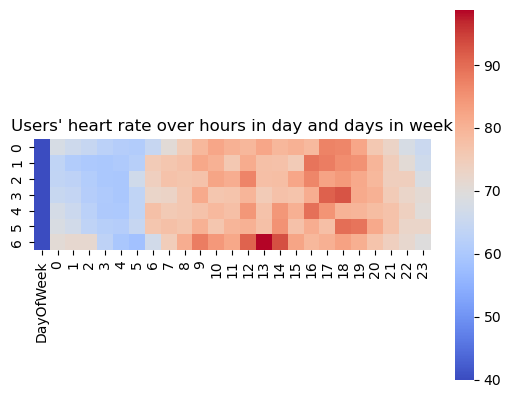

In [81]:
sns.heatmap(heartrate_week_heatmap, cmap="coolwarm", annot=False, square = True, vmin = 40);
plt.title('Users\' heart rate over hours in day and days in week');

It can be seen from the map that at sleeping hours, users' heart rate would drop significantly and usually it starts to rise at 6am on the weekday, on the weekend, it started to rise at 7am. This could be because the users wake up later on the weekend as when people sleep, their heart rate drops.

We can also spot from the map that on Sat, the heart rate does not drop under 70 until 3am. This may be because they stay up late on Fri night.

#### 4.2 Users who don't track the heart rate

This session aims to find the diffence between factors based on users behaviour of whether they track or share their heart rate or not

In [82]:
list_user_track_HR = Data.Id[~Data.HeartRate.isnull()]

In [83]:
user_track_HR = Data[['Id', 'TotalSteps', 'TotalDistance', 'Calories',
       'TotalMinutesAsleep']][Data.Id.isin(list_user_track_HR)]
user_track_HR

,Id,TotalSteps,TotalDistance,Calories,TotalMinutesAsleep
154,2022484408,11875,8.340000,2390,NaN
155,2022484408,12024,8.500000,2601,NaN
156,2022484408,10690,7.500000,2312,NaN
157,2022484408,11034,8.030000,2525,NaN
158,2022484408,10100,7.090000,2177,NaN
...,...,...,...,...,...
935,8877689391,10686,8.110000,2847,NaN
936,8877689391,20226,18.250000,3710,NaN
937,8877689391,10733,8.150000,2832,NaN
938,8877689391,21420,19.559999,3832,NaN


In [84]:
user_track_HR.columns = ['yId', 'yTotalSteps', 'yTotalDistance', 'yCalories', 'yTotalMinutesAsleep']

In [85]:
user_not_track_HR = Data[['Id', 'TotalSteps', 'TotalDistance', 'Calories',
       'TotalMinutesAsleep',]][~Data.Id.isin(list_user_track_HR)]
user_not_track_HR

,Id,TotalSteps,TotalDistance,Calories,TotalMinutesAsleep
0,1503960366,13162,8.50,1985,327.0
1,1503960366,10735,6.97,1797,384.0
2,1503960366,10460,6.74,1776,NaN
3,1503960366,9762,6.28,1745,412.0
4,1503960366,12669,8.16,1863,340.0
...,...,...,...,...,...
875,8583815059,9217,7.19,2940,NaN
876,8583815059,9877,7.70,2947,NaN
877,8583815059,8240,6.43,2846,NaN
878,8583815059,8701,6.79,2804,NaN


In [86]:
user_not_track_HR.columns = ['nId', 'nTotalSteps', 'nTotalDistance', 'nCalories', 'nTotalMinutesAsleep']

In [87]:
len(user_track_HR.yId.unique())

14

In [88]:
len(user_not_track_HR.nId.unique())

19

<Axes: xlabel='Type'>

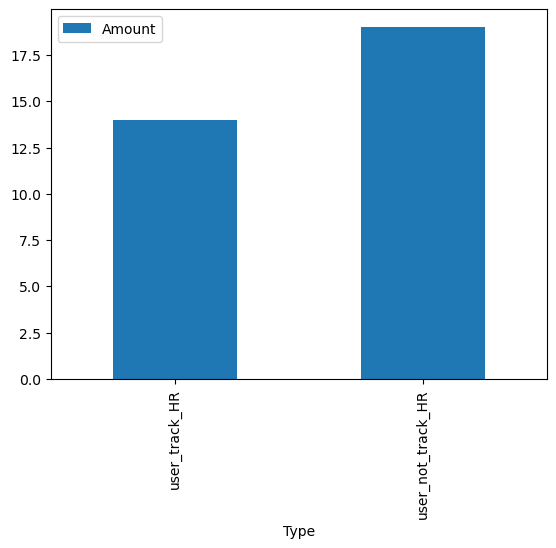

In [89]:
extra1 = [
    ["user_track_HR", 14],
    ["user_not_track_HR", 19] ]

extra_chart1 = pd.DataFrame(extra1, columns=["Type", "Amount"])
extra_chart1.plot.bar(x = 'Type')

user_track_HR contains for 42% while user_not_track_HR contains for 58% of total

In [90]:
# Concat the dataframe of user_track_HR and user_not_track_HR for statistical visual purpose
user_HR = pd.concat([user_track_HR, user_not_track_HR], axis = 1)

In [91]:
user_HR 

,yId,yTotalSteps,yTotalDistance,yCalories,yTotalMinutesAsleep,nId,nTotalSteps,nTotalDistance,nCalories,nTotalMinutesAsleep
154,2.022484e+09,11875.0,8.34,2390.0,NaN,NaN,NaN,NaN,NaN,NaN
155,2.022484e+09,12024.0,8.50,2601.0,NaN,NaN,NaN,NaN,NaN,NaN
156,2.022484e+09,10690.0,7.50,2312.0,NaN,NaN,NaN,NaN,NaN,NaN
157,2.022484e+09,11034.0,8.03,2525.0,NaN,NaN,NaN,NaN,NaN,NaN
158,2.022484e+09,10100.0,7.09,2177.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
875,NaN,NaN,NaN,NaN,NaN,8.583815e+09,9217.0,7.19,2940.0,NaN
876,NaN,NaN,NaN,NaN,NaN,8.583815e+09,9877.0,7.70,2947.0,NaN
877,NaN,NaN,NaN,NaN,NaN,8.583815e+09,8240.0,6.43,2846.0,NaN
878,NaN,NaN,NaN,NaN,NaN,8.583815e+09,8701.0,6.79,2804.0,NaN


<Axes: >

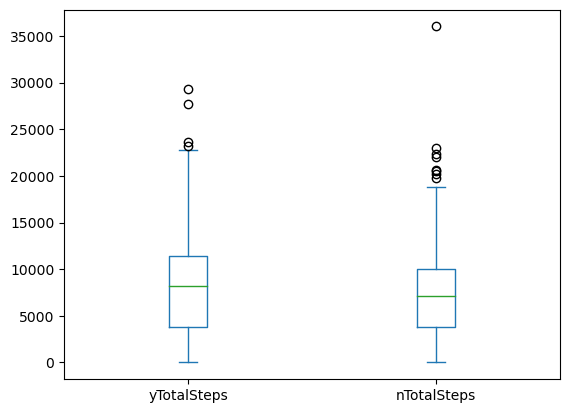

In [92]:
user_HR[['yTotalSteps', 'nTotalSteps']].plot.box()

<Axes: >

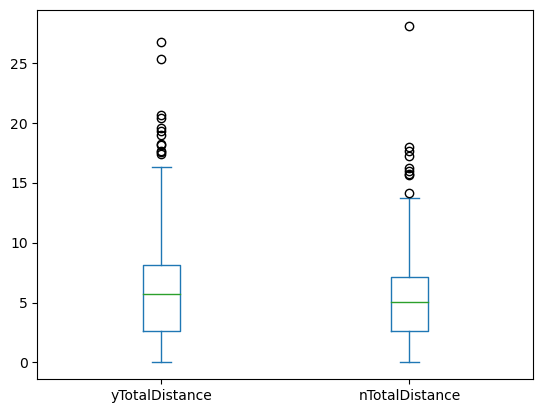

In [93]:
user_HR[['yTotalDistance', 'nTotalDistance']].plot.box()

<Axes: >

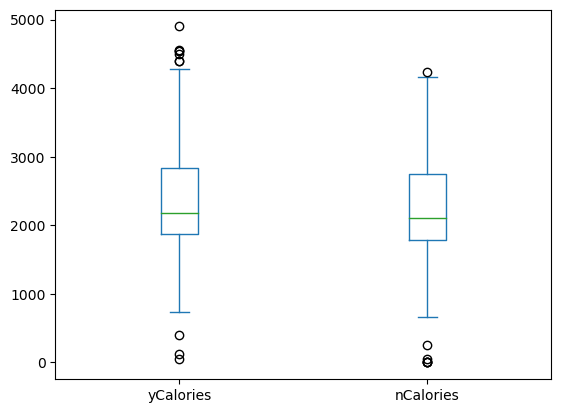

In [94]:
user_HR[['yCalories', 'nCalories']].plot.box()

<Axes: >

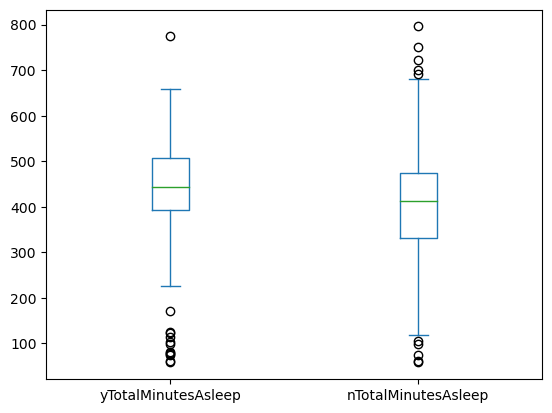

In [95]:
user_HR[['yTotalMinutesAsleep', 'nTotalMinutesAsleep']].plot.box()

The difference between user_track_HR and user_not_track_HR is not significant is most factors

### 5. Dive Deep Into Sleeping Behaviour

#### 5.1 Relation between sleeping information fields

This session aims to analyze the correlation of factor in sleeping information fields

In [96]:
sleep_relation = Data[['ActivityDate', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']]

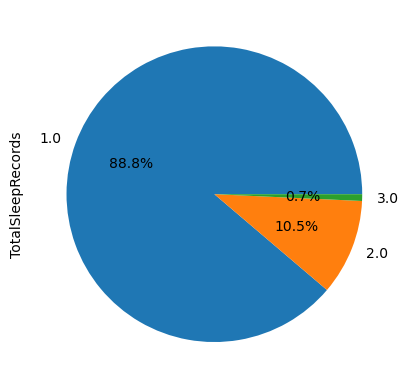

In [97]:
# Make a pie chart to visualize the percentage of each element in TotalSleepRecords column
sleep_relation['TotalSleepRecords'].value_counts().plot.pie(autopct='%1.1f%%');

Users who have 1 sleep record per day contains for 88.8%, users who have 2 sleep records per day contains for 10.5% of total, the number of users with 3 sleep records per day is not considerable.

This could mean that most users don't take nap at day

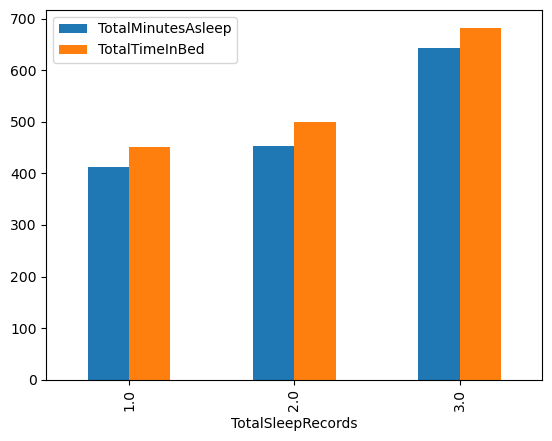

In [98]:
# Making a bar chart to visualize the correlation of sleeping fields information
sleep_relation.groupby('TotalSleepRecords')[['TotalMinutesAsleep', 'TotalTimeInBed']].mean().plot.bar();

As seen from the chart, the more sleeep records users have, the longer time they spend on bed and they sleep are. Users spend at least around 7 hour per day for sleeping.

#### 5.2 Users who don't track their sleep

This session aims to find the diffence between factors based on users behaviour of whether they track or share their sleep or not

In [99]:
list_user_track_sleep = Data.Id[~Data.TotalMinutesAsleep.isnull()]

In [100]:
user_track_sleep = Data[['Id', 'TotalSteps', 'TotalDistance', 'Calories',
       'HeartRate']][Data.Id.isin(list_user_track_sleep)]

In [101]:
user_track_sleep.columns = [['yId', 'yTotalSteps', 'yTotalDistance', 'yCalories', 'yHeartRate']]

In [102]:
user_not_track_sleep = Data[['Id', 'TotalSteps', 'TotalDistance', 'Calories',
       'HeartRate']][~Data.Id.isin(list_user_track_sleep)]

In [103]:
user_not_track_sleep.columns = [['nId', 'nTotalSteps', 'nTotalDistance', 'nCalories', 'nHeartRate']]

In [104]:
user_track_sleep.yId.nunique()

yId    24
dtype: int64

In [105]:
user_not_track_sleep.nId.nunique()

nId    9
dtype: int64

<Axes: xlabel='Type'>

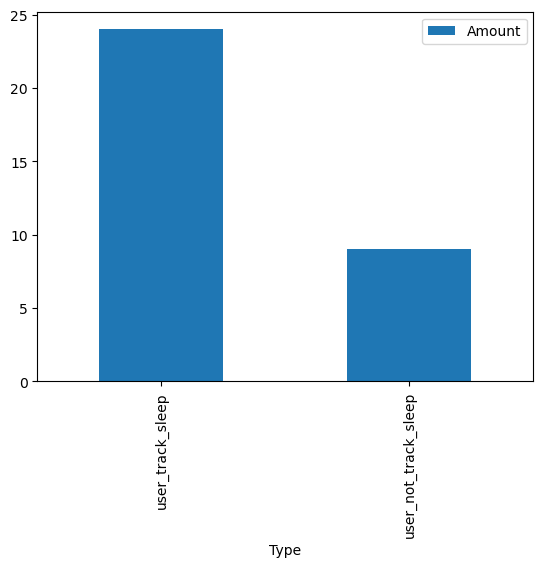

In [106]:
extra2 = [
    ["user_track_sleep", 24],
    ["user_not_track_sleep", 9] ]

extra_chart2 = pd.DataFrame(extra2, columns=["Type", "Amount"])
extra_chart2.plot.bar(x = 'Type')

user_track_sleep contains for 73% while user_track_sleep contains for only 27% of total

In [107]:
# Concat the 2 dataframe user_track_sleep and user_not_track_sleep for statistical visual purpose
user_sleep = pd.concat([user_track_sleep, user_not_track_sleep], axis = 1)

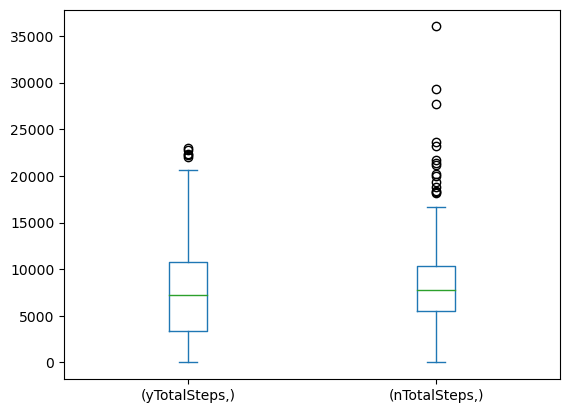

In [108]:
user_sleep[['yTotalSteps', 'nTotalSteps']].plot.box();

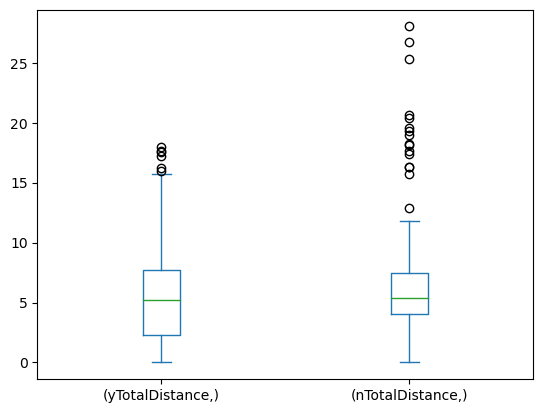

In [109]:
user_sleep[['yTotalDistance', 'nTotalDistance']].plot.box();

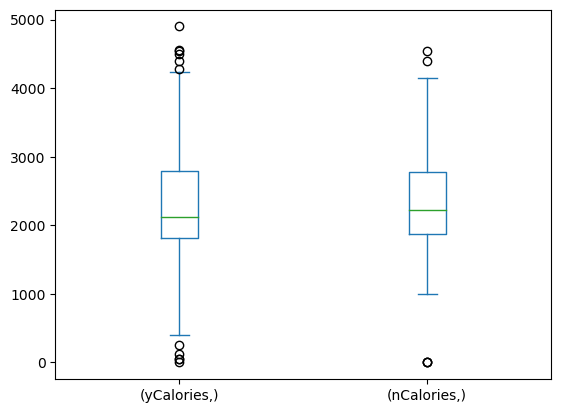

In [110]:
user_sleep[['yCalories', 'nCalories']].plot.box();

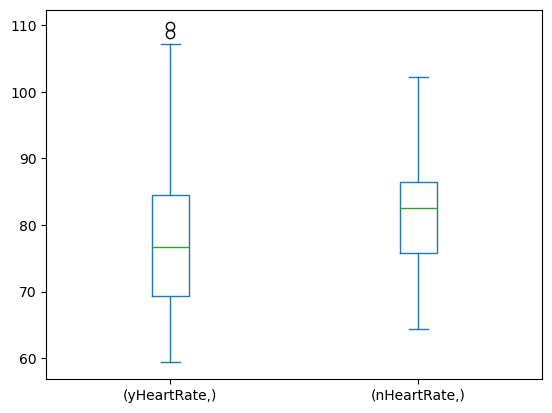

In [111]:
user_sleep[['yHeartRate', 'nHeartRate']].plot.box();

The difference between user_track_sleep and user_not_track_sleep is not significant is most factors

# ACT

### KEY FINDINGS:
- There is a strong correlation between walking steps and distance, an intermediate correlation between walking steps and calories burnt per day.
- User who has the average of more than 10000 walking steps per day only contains for 21% of the total user, 79% are those who has the average of less than 10000 steps per day. The gap of average steps between these 2 types of user is 6000.
- User who has the average of more than 10000 walking steps per day sleep have a tendancy to sleep shorter than those with average less than 10000 steps per day, the gap is around 100 minutes per night.
- Users tend to walk more on Tuesday and Saturday and sleep longer on Sunday.
- The average heart rate on Fri night does not drop under 70 until 3am of the next Sat
- The percentage of user who recorded and shared the heart rate is 42%, user who recorded and shared sleep is 73%
- User averagely sleep around at least 7 hours per night, only around 10% sleep more than twice per day

### RECOMMENDATION:
- Bellabeat could target to customers who want to lose weight and encourage them to walk more though notification, challenges and rewards on the app
- Doing more research to segment users and design different models for each types. For example users who has the avarage walking steps of more than 10000 per day should be encouraged to walk more while users who has the avarage walking steps of less than 10000 should be encouraged to sleep more.
- Investigating on why users having the avarage walking steps of more than 10000 per day sleep less. Is that because they are tired and could not sleep easily or they are busy and don't spend much time on sleep or any other reason? Insights from this finding could lead to solution to maintain this types of user by enhance their experience with Bellabeat.
- Investigating on why users' heart rate tend to be higher than under 70 on Friday night. If possible, sending notifications to remind users to sleep on time on Friday night.
- Investigating on why users' steps on Tuesday and Sunday are high.
- Investigating on users don't track or share their information about the heart rate. Is it because they don't know know to track it, how to share it or they don't want to share it. Following up with solutions like delivering clear instruction on the app and doing survey to know more about users' insight on this.
- Investigate on users don't track or share their information about their sleeping. Is it because they don't know know to track it, how to share it, they don't want to share it or they are not comfortable to wear the device when sleeping. Following up with solutions like for the heart rate.
- Doing a survey on whether napping make users feel healthier. If yes, encouraging people to take nap.
- The encouragement on users could include push notifications, in-app blogs, challenges, compliment for achievement, etc with data-driven wording. These methods should be measure to to find out the effective ones

 **As this is my first project on Kaggle, it could have mistakes that I could not figure out myself, please comment and share your thought if you have any.Thank you for reading!**